# **Project 2 - Face Recognition**

Zaid Parvej Patel (zp2090)
Khalid Nizamuddin Ansari (ka2612)

In [1]:
#importing the necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from PIL import Image 

In [2]:
#Reading the necessary images

images = []
images.append(Image.open('/content/subject01.happy.jpg'))
images.append(Image.open('/content/subject02.normal.jpg'))
images.append(Image.open('/content/subject03.normal.jpg'))
images.append(Image.open('/content/subject07.centerlight.jpg'))
images.append(Image.open('/content/subject10.normal.jpg'))
images.append(Image.open('/content/subject11.normal.jpg'))
images.append(Image.open('/content/subject14.normal.jpg'))
images.append(Image.open('/content/subject15.normal.jpg'))

In [3]:
# Storing the training images as numpy arrays in a list

df_list = []
for i in range(0,len(images)):
    data = np.asarray(images[i])
    df_list.append(list(data.flatten()))

In [4]:
len(df_list[7])

45045

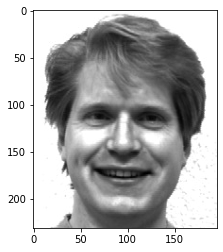

In [5]:
# Plotting the sample image 

plt.imshow(np.array(df_list[0]).reshape(231,195),cmap="gray")

In [6]:
# function to plot the faces

def plot_faces(pixels):
    fig, axes = plt.subplots(4, 2, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels[i]).reshape(231, 195), cmap="gray")
    plt.show()

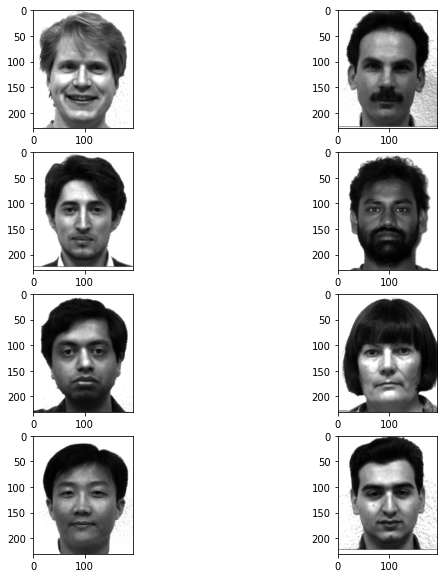

In [7]:
# Plotting the faces

plot_faces(df_list)

# **Building the eigenface space**

Eigenface Training


In [8]:
#  mean calculated for each row using np.mean() 

m = np.mean(df_list, axis=0)

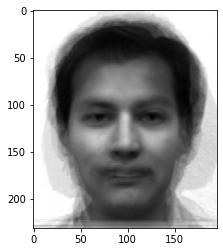

In [9]:
#plot mean face

plt.imshow(m.reshape(231, 195), cmap="gray")
plt.savefig("mean-face-image.jpg")

In [10]:
# Creating a matrix of Rvectors by subtracting mean from each image

Rvec = np.empty((0,len(df_list[0])))

for i in range(0, len(df_list)):
    Rvec = np.append(Rvec, np.array([df_list[i] - m]), axis=0)

In [12]:
# Computing A

A = Rvec.T

In [13]:
A

array([[   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       ...,
       [  19.   ,   20.   ,   20.   , ..., -124.   ,   20.   ,   20.   ],
       [  19.375,   22.375,   22.375, ..., -125.625,   22.375,   22.375],
       [  20.375,   23.375,   23.375, ..., -113.625,   23.375,   23.375]])

In [14]:
A.shape

(45045, 8)

In [15]:
# Covariance matrix 

# Very heavy to compute

# C = np.matmul(A,A.T)

In [16]:
# C.shape

In [17]:
# Compute L

L = np.matmul(A.T, A)

In [18]:
L.shape

(8, 8)

In [19]:
# Compute Eigenvalues and EigenVectors of L

w,v = np.linalg.eig(L)

In [20]:
# M largest eigenvectors of C: U = AV

u = np.matmul(A,v)

In [21]:
u

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.21271292e+02,  4.63882020e+01,  1.86517468e-14, ...,
         3.80391906e+00,  6.86658288e-01, -1.06021426e+01],
       [ 1.24693635e+02,  4.31669894e+01,  2.22044605e-14, ...,
         5.73981124e+00,  3.85127803e-01, -2.14609409e+01],
       [ 1.15655232e+02,  3.18780171e+01,  1.95399252e-14, ...,
         7.25070140e+00, -7.05507445e-01, -3.76143876e+01]])

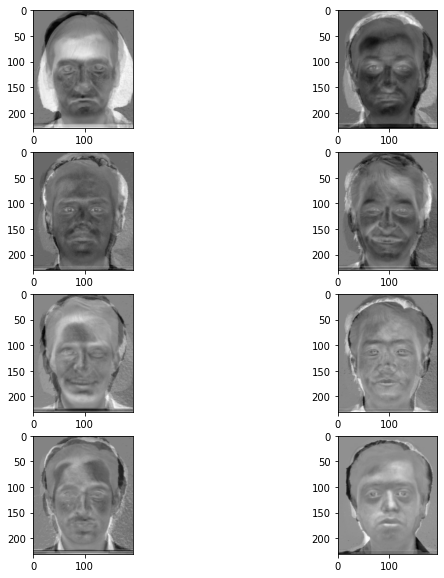

In [22]:
# Plotting eigen faces

plot_faces(u.T)

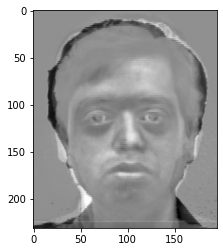

In [23]:
# Saving Eigen Faces image files

plt.imshow(u.T[0].reshape(231, 195), cmap="gray")
plt.savefig("eigen-face-1.jpg")
plt.imshow(u.T[1].reshape(231, 195), cmap="gray")
plt.savefig("eigen-face-2.jpg")
plt.imshow(u.T[2].reshape(231, 195), cmap="gray")
plt.savefig("eigen-face-3.jpg")
plt.imshow(u.T[3].reshape(231, 195), cmap="gray")
plt.savefig("eigen-face-4.jpg")
plt.imshow(u.T[4].reshape(231, 195), cmap="gray")
plt.savefig("eigen-face-5.jpg")
plt.imshow(u.T[5].reshape(231, 195), cmap="gray")
plt.savefig("eigen-face-6.jpg")
plt.imshow(u.T[6].reshape(231, 195), cmap="gray")
plt.savefig("eigen-face-7.jpg")
plt.imshow(u.T[7].reshape(231, 195), cmap="gray")
plt.savefig("eigen-face-8.jpg")

In [24]:
# Dimensions of matrix U

u.shape

(45045, 8)

In [25]:
# Computing omega for each image 

omega = np.empty((0,A.shape[1]))

for i in range(0,A.shape[1]):
    omega = np.append(omega, np.array([np.matmul(u.T,Rvec[i])]), axis=0)

In [26]:
omega

array([[ 1.60187559e+07, -3.33116597e+07, -4.99127352e-09,
        -9.00913744e+07,  5.05906408e+07, -1.72266362e+07,
        -1.16657524e+07, -1.31487345e+06],
       [ 8.21176376e+07, -5.05573710e+07, -1.57249859e-08,
         5.53498406e+07,  6.00451929e+07,  1.15300218e+07,
         3.09460980e+07, -3.07315889e+06],
       [ 7.91941041e+07, -1.62586757e+07, -6.23048805e-10,
        -4.01456153e+07, -6.28173919e+07, -3.23404267e+06,
         4.06735524e+07, -1.24791544e+07],
       [ 3.08733154e+06,  9.92361069e+07,  7.15640244e-08,
         5.03852274e+07,  1.17404601e+06, -2.35573871e+07,
        -8.01780000e+06, -3.71206584e+07],
       [-4.02141286e+06,  7.52452236e+07, -2.85514888e-10,
         9.71677281e+06, -4.36315496e+06, -4.13968681e+06,
         3.57311192e+06,  6.82757689e+07],
       [-2.97846453e+08, -7.05477790e+07, -5.42755290e-08,
         1.85004946e+07, -1.39750180e+07, -6.91361191e+05,
        -6.17719521e+05, -1.13339880e+06],
       [-2.85928788e+07,  8.101564

In [27]:
# Dimensions for Omega

omega.shape

(8, 8)

# **Eigenface Recognition**


In [28]:
# Loading the test images

test_images = []
test_images.append(Image.open('/content/subject01.normal.jpg'))
test_images.append(Image.open('/content/subject07.happy.jpg'))
test_images.append(Image.open('/content/subject07.normal.jpg'))
test_images.append(Image.open('/content/subject11.happy.jpg'))
test_images.append(Image.open('/content/subject14.happy.jpg'))
test_images.append(Image.open('/content/subject14.sad.jpg'))

In [29]:
# Converting the images to numpy array and appending it to list

test_list = []

for i in range(0,len(test_images)):
    data = np.asarray(test_images[i])
    test_list.append(list(data.flatten()))

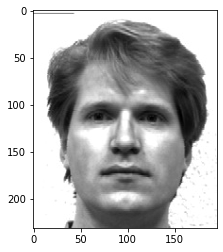

In [31]:
#Displaying a sample test image

plt.imshow(np.array(test_list[0]).reshape(231,195),cmap="gray")

## Testing one input image 

In [32]:
# Taking an input image to recognize similar face from the training set

I = np.array(test_list)[0]

In [33]:
# Dimensions of Input image 

I.shape

(45045,)

In [34]:
# calculating Ivec

Ivec = np.array([I - m]).T

In [35]:
Ivec

array([[ 0.   ],
       [ 0.   ],
       [ 0.   ],
       ...,
       [20.   ],
       [22.375],
       [23.375]])

In [36]:
u.T.shape

(8, 45045)

In [37]:
Ivec.shape

(45045, 1)

In [38]:
# Computing Omega matrix of input image

OmegaI = np.matmul(u.T,Ivec).T

In [39]:
# Function to compute Omega matrix of multiple Test/Input images

def omegaI(X_test,m,i):
    I = np.array(X_test)[i]
    Ivec = np.array([I - m]).T
    return np.matmul(u.T,Ivec).T

In [40]:
# Function to compute nearest neighbor of the test/Input Image by 
# computing distance between the Eigenface coefficients

def nearest_neighbor(OmegaI, omega):
    euc_dist = np.empty((0,omega.shape[0]))
    for i in range(0,omega.shape[0]):
        euc_dist = np.append(euc_dist, np.linalg.norm(OmegaI-omega[i]))
    result = np.where(euc_dist == min(euc_dist))
    return result[0][0]

In [41]:
nn = nearest_neighbor(OmegaI, omega)
print(nn)

0


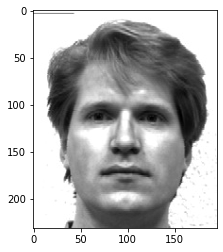

In [42]:
# Plotting the input image

plt.imshow(I.reshape(231,195), cmap='gray')

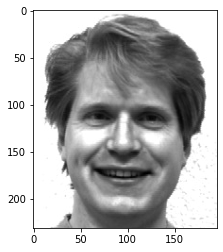

In [43]:
# Plotting the similar image as recognized using the face recognition technique implemented

plt.imshow(np.array(df_list)[nn].reshape(231, 195), cmap='gray')

# Recognition for all Test Images




In [44]:
omega_I = []

for i in range(len(test_list)):
    omega_I.append(omegaI(test_list,m,i))

In [45]:
omega_I

[array([[-1.55489186e+07, -1.67588571e+07, -1.87198871e-08,
         -8.98923136e+07,  2.86103955e+07, -4.21280388e+06,
         -1.31108982e+07,  1.77733252e+06]]),
 array([[ 9.39416811e+07,  2.09305169e+07,  4.60118979e-08,
          3.31479938e+07, -6.44310789e+06, -1.18606888e+07,
         -3.48835699e+06, -1.69635470e+07]]),
 array([[ 1.12978901e+08, -8.00138951e+06,  3.29342227e-08,
          4.41416172e+07, -1.70653561e+07, -8.64789759e+05,
          5.01155401e+06, -2.26560255e+07]]),
 array([[-2.82258502e+08, -8.06768810e+07, -6.08971612e-08,
          1.53418745e+07, -4.13344001e+06,  4.32562701e+06,
          3.31236602e+05, -3.11279058e+06]]),
 array([[-1.13354498e+07,  6.57575582e+07, -1.22245622e-09,
         -4.00260981e+07,  5.29920536e+06,  1.45319843e+07,
         -1.12780581e+07, -2.49565291e+07]]),
 array([[-1.12736682e+07,  7.52281309e+07, -9.84591757e-09,
         -2.28207746e+07,  2.69436715e+06,  2.39736971e+07,
         -3.97713477e+06, -2.02580871e+07]])]

## Accuracy of recognition for all test images

In [48]:
# Computing accuracy of our recognized images if the corresponding labels match

nn_list = []

original_label = [0, 3, 3, 5, 6, 6] # Original labels assigned manually by identifying separate individuals
count = 0
for i in range(0,len(test_list)):
    nn_list.append(nearest_neighbor(omegaI(test_list,m,i), omega))


for i in range(0,len(test_list)):
    if original_label[i] == nn_list[i]:
        count += 1

print("accuracy: ",count/len(test_list)*100 , "%")
print("Original label:",original_label)
print("Recognized image label:",nn_list)

accuracy:  66.66666666666666 %
Original label: [0, 3, 3, 5, 6, 6]
Recognized image label: [0, 1, 1, 5, 6, 6]


The model gives an accuracy of 66.66% which means that it classified 4 out of the given 6 test images correctly corresponding to the same person.

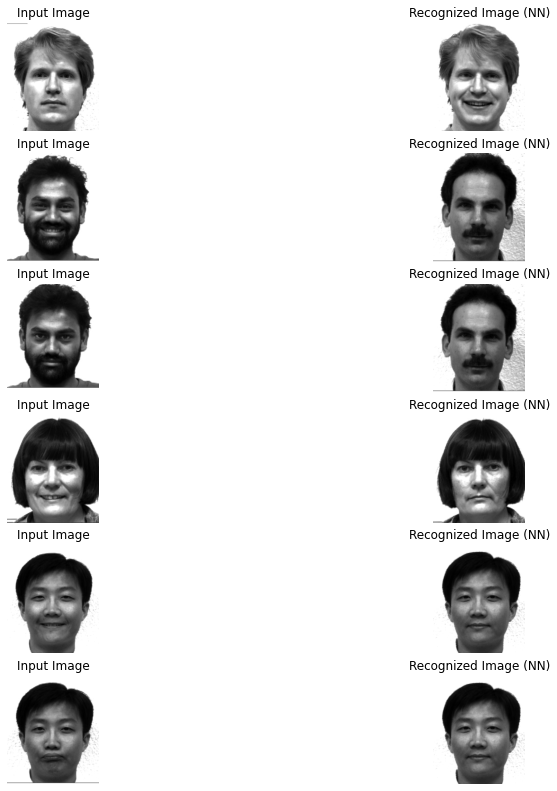

In [47]:
#Plotting the testing/input image with its resultant nearest neighbor

fig = plt.figure(figsize=(14, 14))

# Adds a subplot at the 1st position
fig.add_subplot(6, 2, 1)
plt.imshow(np.array(test_list)[0].reshape(231,195), cmap='gray')
plt.axis('off')
plt.title("Input Image")

# Adds a subplot at the 2nd position
fig.add_subplot(6, 2, 2)
plt.imshow(np.array(df_list)[nn_list[0]].reshape(231,195), cmap='gray')
plt.axis('off')
plt.title("Recognized Image (NN)")

# Adds a subplot at the 1st position
fig.add_subplot(6, 2, 3)
plt.imshow(np.array(test_list)[1].reshape(231,195), cmap='gray')
plt.axis('off')
plt.title("Input Image")

# Adds a subplot at the 2nd position
fig.add_subplot(6, 2, 4)
plt.imshow(np.array(df_list)[nn_list[1]].reshape(231,195), cmap='gray')
plt.axis('off')
plt.title("Recognized Image (NN)")

# Adds a subplot at the 1st position
fig.add_subplot(6, 2, 5)
plt.imshow(np.array(test_list)[2].reshape(231,195), cmap='gray')
plt.axis('off')
plt.title("Input Image")

# Adds a subplot at the 2nd position
fig.add_subplot(6, 2, 6)
plt.imshow(np.array(df_list)[nn_list[2]].reshape(231,195), cmap='gray')
plt.axis('off')
plt.title("Recognized Image (NN)")

# Adds a subplot at the 1st position
fig.add_subplot(6, 2, 7)
plt.imshow(np.array(test_list)[3].reshape(231,195), cmap='gray')
plt.axis('off')
plt.title("Input Image")

# Adds a subplot at the 2nd position
fig.add_subplot(6, 2, 8)
plt.imshow(np.array(df_list)[nn_list[3]].reshape(231,195), cmap='gray')
plt.axis('off')
plt.title("Recognized Image (NN)")

# Adds a subplot at the 1st position
fig.add_subplot(6, 2, 9)
plt.imshow(np.array(test_list)[4].reshape(231,195), cmap='gray')
plt.axis('off')
plt.title("Input Image")

# Adds a subplot at the 2nd position
fig.add_subplot(6, 2, 10)
plt.imshow(np.array(df_list)[nn_list[4]].reshape(231,195), cmap='gray')
plt.axis('off')
plt.title("Recognized Image (NN)")


# Adds a subplot at the 1st position
fig.add_subplot(6, 2, 11)
plt.imshow(np.array(test_list)[5].reshape(231,195), cmap='gray')
plt.axis('off')
plt.title("Input Image")

# Adds a subplot at the 2nd position
fig.add_subplot(6, 2, 12)
plt.imshow(np.array(df_list)[nn_list[5]].reshape(231,195), cmap='gray')
plt.axis('off')
plt.title("Recognized Image (NN)")

plt.savefig('output.jpg')